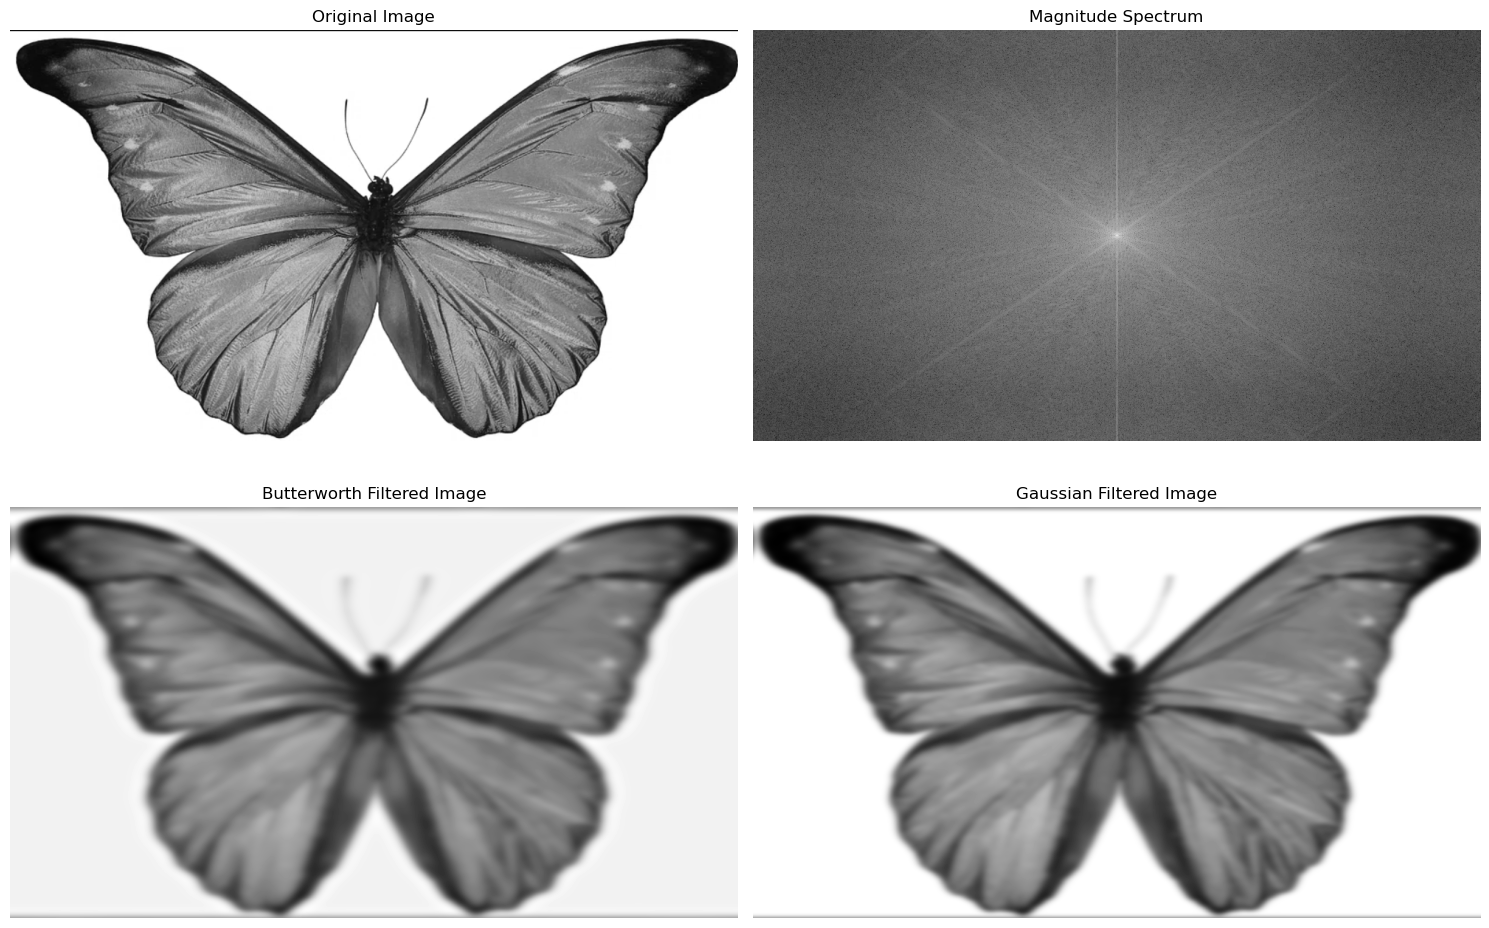

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color

def butterworth_filter(shape, cutoff, order):
    rows, cols = shape
    x = np.arange(cols) - cols // 2
    y = np.arange(rows) - rows // 2
    X, Y = np.meshgrid(x, y)
    D = np.sqrt(X**2 + Y**2)
    H = 1 / (1 + (D / cutoff)**(2 * order))
    return H

def gaussian_filter(shape, cutoff):
    rows, cols = shape
    x = np.arange(cols) - cols // 2
    y = np.arange(rows) - rows // 2
    X, Y = np.meshgrid(x, y)
    D = np.sqrt(X**2 + Y**2)
    H = np.exp(-(D**2) / (2 * (cutoff**2)))
    return H

# convert to grayscale
image_path = r'C:\Users\pbsjy\Downloads\butterfly_image.png'  
image = Image.open(image_path).convert('L')
image_array = np.array(image)

# Fourier Transform
F = np.fft.fft2(image_array)
F_shifted = np.fft.fftshift(F)
magnitude_spectrum = np.log(np.abs(F_shifted) + 1)

# Applying Butterworth filter
butterworth = butterworth_filter(image_array.shape, cutoff=30, order=2)
F_filtered_butterworth = F_shifted * butterworth
filtered_butterworth = np.fft.ifftshift(F_filtered_butterworth)
image_butterworth = np.fft.ifft2(filtered_butterworth).real

# Applying Gaussian filter
gaussian = gaussian_filter(image_array.shape, cutoff=30)
F_filtered_gaussian = F_shifted * gaussian
filtered_gaussian = np.fft.ifftshift(F_filtered_gaussian)
image_gaussian = np.fft.ifft2(filtered_gaussian).real


plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(image_butterworth, cmap='gray')
plt.title('Butterworth Filtered Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(image_gaussian, cmap='gray')
plt.title('Gaussian Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Save the results
Image.fromarray(np.uint8(image_butterworth)).save('butterworth_filtered_image.jpg')
Image.fromarray(np.uint8(image_gaussian)).save('gaussian_filtered_image.jpg')
